In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def Dataprocess(location):
    df = pd.read_csv(location)
    
    df.drop_duplicates(inplace=True)    # inplace is for overwriting
    
    df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    df.Sex[df.Sex == 'male'] = 1
    df.Sex[df.Sex == 'female'] = 0

    df.Embarked[df.Embarked == 'S'] = 1
    df.Embarked[df.Embarked == 'C'] = 0
    df.Embarked[df.Embarked == 'Q'] = 2
    
    age = df['Age']
    df['Age'] = (age - age.mean())/age.std()
    df['Age'].fillna(df['Age'].mean())

    fare = df['Fare']
    df['Fare'] = (fare - fare.mean())/fare.std()
    df['Fare'].fillna(df['Fare'].mean())

    df.ffill(inplace = True) 
    return df

In [3]:
# split into train test sets
train_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\train.csv"
df_train = Dataprocess(train_loc)
X_train = np.array(df_train.drop(['Survived'],axis = 1))
y_train = np.array(df_train['Survived'])

test_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\test.csv"
df_test = Dataprocess(test_loc)
X_test = np.array(df_test)

C:\Users\varun\AppData\Local\Temp/ipykernel_5976/2589322004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'male'] = 1
C:\Users\varun\AppData\Local\Temp/ipykernel_5976/2589322004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'female'] = 0
C:\Users\varun\AppData\Local\Temp/ipykernel_5976/2589322004.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == 'S'] = 1
C:\Use

In [4]:
y_train = y_train.reshape(y_train.shape[0],1)
print('X_train: ' ,(X_train.shape))
print('Y_train: ' ,(y_train.shape))
print('X_test:  ' ,(X_test.shape))
iterations = []
cost = []

X_train:  (891, 7)
Y_train:  (891, 1)
X_test:   (418, 7)


In [5]:
def sigmoid(z) :
    a = 1/(1+np.exp(-z))
    return a

In [6]:
def cost_function(hypothesis):
    cost = -np.mean(y_train*np.log(hypothesis) + (1-y_train)*np.log(1-hypothesis))
    return cost

In [7]:
def gradient_descent(bias,weights,m,learning_rate,iter) :
    for i in range(iter) :
        hypothesis = sigmoid(np.dot(X_train,weights) + bias).reshape(X_train.shape[0],1)      # 100*3  3*1 ---> 100*1
        weights = weights - learning_rate*(np.mean(X_train*(hypothesis-y_train),axis=0).reshape(m,1))
        bias = bias - learning_rate*(np.mean(hypothesis-y_train))
        if i%1000 == 0:
            cost.append(cost_function(hypothesis))
            iterations.append(i)
    print("Final cost",cost)
    return weights

In [8]:
m = X_train.shape[1]
weights = (np.random.randn(m) * 0.01).reshape(m,1)
bias = np.array([-1])

print(y_train.shape,weights.shape)

print("Weights initially",weights)
weights = gradient_descent(bias,weights,m,learning_rate=0.5,iter=10000)
print("Weights final",weights)

(891, 1) (7, 1)
Weights initially [[-0.00811499]
 [ 0.01536858]
 [ 0.01430439]
 [-0.00981682]
 [ 0.00725452]
 [-0.01524787]
 [ 0.00031067]]
Final cost [0.7012160108117503, 0.4433314267646311, 0.4432356995710978, 0.44323550046675547, 0.44323550003731677, 0.443235500036389, 0.44323550003638695, 0.44323550003638695, 0.44323550003638695, 0.44323550003638695]
Weights final [[-1.02943499]
 [-2.80878064]
 [-0.48545997]
 [-0.34216139]
 [-0.12163795]
 [ 0.14936264]
 [-0.1144695 ]]


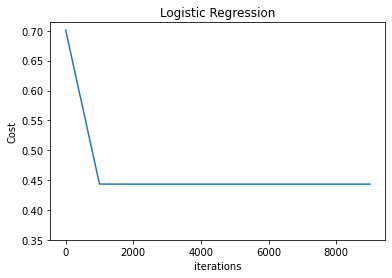

In [13]:
import matplotlib.pyplot as plt

x=iterations
y=cost

plt.plot(x,y)

y_ticks = [0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35]
plt.yticks(y_ticks)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title("Logistic Regression")
plt.show()

In [10]:
p = sigmoid(np.dot(X_train,weights)) >= 0.5
accuracy = p == y_train
print(np.mean(accuracy))

0.6184062850729517
